<a href="https://colab.research.google.com/github/vicentebrusamolin/Kaggle_MNIST/blob/main/PMR3508_2024_85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PMR3508 - Exercício Programa 02**: <br> **Redes Neurais e o Dataset MNIST**
---
---

## ✏️ **Cabeçalho**:

### **Nome**: `Vicente Valério Brusamolin`
### **NUSP**: `13500687`
### **Hash**: `85`

---

## 📜 **Descrição:**

Neste exercício, você irá trabalhar com o **dataset MNIST**, um conjunto de dados com 70.000 imagens de dígitos escritos à mão. Seu objetivo será aplicar os conceitos de **Redes Neurais Artificiais (ANNs)** vistos na aula teórica. Este EP está dividido em tarefas, sua formatação não deve ser alterada, mas novas células de código ou texto podem ser criadas nos blocos de cada tarefa.

---

## ⚠️ **Instruções:**
- Complete todas as tarefas abaixo, respondendo às perguntas e escrevendo o código necessário.
- Comente seu código para facilitar a correção.
- Entregue o notebook no formato `.ipynb`.

---



## ✅ **Tarefas:**

1. **Probabilidades de dígitos no *dataset***       ⇒ `2 pontos`
2. **Análise Exploratória de Dados (EDA)**          ⇒ `2 pontos`
3. **Treinamento e teste de Modelos**               ⇒ `2 pontos`
4. **Comunicação de Resultados e Visualizações**    ⇒ `2 pontos`
5. **Publicação no *Kaggle* e Documentação**        ⇒ `2 pontos`

---

<br>
<center>
        <h1>
        <b>
        BOA SORTE !!!
        </b>
        </h1>
</center>
<br>

---
---

## ⏳ Loading dos Dados

In [ ]:
import pickle
import random
import numpy as np
import os
from os.path import join

# Configuração de seeds para replicabilidade
np.random.seed(42)  # Seed para NumPy
random.seed(42)     # Seed para o módulo random

input_path = os.getcwd()  # Obtém o diretório atual
images_filepath = join(input_path, 'MNIST-images.pkl')
labels_filepath = join(input_path, 'MNIST-labels.pkl')
validation_images_filepath = join(input_path, 'MNIST-validation-images.pkl')

with open(images_filepath, 'rb') as f:
    X_tot = pickle.load(f)

with open(labels_filepath, 'rb') as f:
    y_tot = pickle.load(f)

with open(validation_images_filepath, 'rb') as f:
    X_val = pickle.load(f)

In [ ]:
# Imagens
X_tot.shape

(60000, 28, 28)

In [ ]:
# Labels
y_tot.shape

(60000,)

In [ ]:
X_val.shape

(10000, 28, 28)

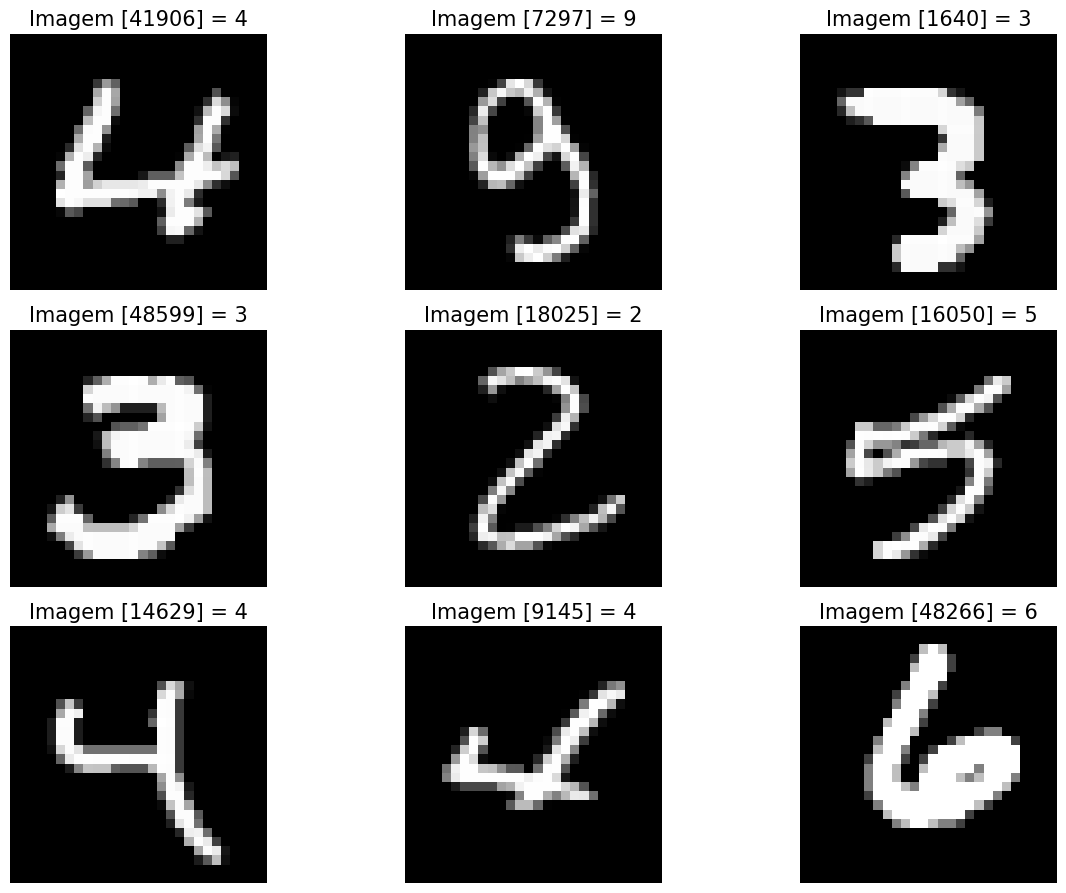

In [ ]:
'''
TESTE DE CARREGAMENTO DO DATASET POR VISUALIZAÇÃO
Este bloco visualiza algumas imagens do dataset MNIST para verificar se o
carregamento foi realizado corretamente.
'''

%matplotlib inline
import random
import matplotlib.pyplot as plt

def show_images(images, title_texts):
    # Função para mostrar as imagens com seus respectivos títulos
    cols = 3  # Número de colunas na visualização
    rows = int(len(images) / cols) + 1  # Calcula o número de linhas
    plt.figure(figsize=(12, 12))  # Define o tamanho da figura
    index = 1
    for x in zip(images, title_texts):  # Itera sobre as imagens e títulos
        image = x[0]
        title_text = x[1]
        plt.subplot(rows, cols, index)  # Adiciona um subplot
        plt.axis('off')  # Desativa os eixos
        plt.imshow(image, cmap=plt.cm.gray)  # Mostra a imagem em escala de cinza
        if (title_text != ''):
            plt.title(title_text, fontsize=15)  # Define o título da imagem
        index += 1
    plt.tight_layout()  # Ajusta o layout para evitar sobreposição de títulos
    plt.show()  # Exibe a figura com as imagens e títulos

images_2_show = []  # Lista para armazenar as imagens a serem mostradas
titles_2_show = []  # Lista para armazenar os títulos das imagens
# Seleciona aleatoriamente 9 imagens de treino
for i in range(0, 9):
    r = random.randint(1, 60000)
    images_2_show.append(X_tot[r])  # Adiciona a imagem selecionada à lista
    titles_2_show.append(f"Imagem [{str(r)}] = {str(y_tot[r])}")  # Adiciona o título correspondente

show_images(images_2_show, titles_2_show)  # Exibe as imagens selecionadas

# 0️⃣ Suas bibliotecas

In [ ]:
import numpy as np
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from collections import Counter
import pandas as pd


# 1️⃣ Tarefa 01: Probabilidades 🎲

## 🧑🏻‍💻 Item a)

##### Descubra o número do Dataset associado ao seu Hash.


Para descobrir o número do Dataset associado ao meu Hash, 85, verifica-se o campo labels (y_tot) na posição 85:

In [ ]:
y_tot[85]

8

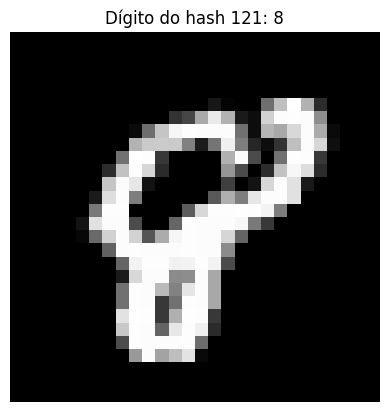

In [ ]:
img = X_tot[85]
plt.imshow(img, cmap='gray')
plt.title(f"Dígito do hash 121: {y_tot[85]}")
plt.axis('off')
plt.show()

## 🔦 Item b)

##### Determine, para a imagem vinculada ao seu Hash, qual é a Probabilidade de um píxel claro (128 - 225) para esta única imagem?

A imagem é composta por 28x28px (total de 784 pixels), sendo que cada pixel pode possuir valores entre 0 a 255. O valor de cada pixel do hash 85 pode ser acessado no seguinte formato: X_tot[85][i][j], em que i representa a linha, e j, a coluna, determinando a posição do pixel na imagem.

In [ ]:
X_tot[85].shape

(28, 28)

In [ ]:
X_tot[85][0][0]

0

Para a contagem de pixels claros, varremos todos os pixels da imagem e verificamos se o valor está no intervalor 128-225:

In [ ]:
count_bright_px = 0    #contagem dos pixels claros
c_tot = 0    #verificar se varreu todos os pixels
for i in range(0,28):
    for j in range(0,28):
        c_tot += 1
        if X_tot[85][i][j] >= 128 and X_tot[85][i][j] <= 225:
            count_bright_px += 1
c_tot, count_bright_px

(784, 50)

Portanto, obteve-se 50 pixels claros. A probabilidade é dada pela divisão entre o número de pixels claros pelo número total de pixels da imagem:

In [ ]:
prob_bright_px = count_bright_px / c_tot
prob_bright_px

0.06377551020408163

A probabilidade é de aproximadamente 6.38%

## ♟️ Item c)

##### Qual é a probabilidade de um píxel ser claro dentre todos os píxeis que tem a mesma classe que a sua imagem obtida em a)?

Primeiro, é necessário verificar no campo label (y_tot) as posições no dataset correspondentes ao número 8:

In [ ]:
pos_list = []    #lista para guardar posições no dataset que correspondem ao número 8
for pos, value in enumerate(y_tot):
    if value == 8:
        pos_list.append(pos)
#pos_list

In [ ]:
len(pos_list)

5856

Tem-se 5856 imagens números 8 dentro da amostragem do dataset. Calcula-se o total de pixels nessas imagens:

In [ ]:
5856 * 28 * 28

4591104

Agora, é necessário computar a quantidade de pixels claros contidas nessas imagens. Para isso, varre-se os pixels de cada imagem:

In [ ]:
count_bright_px_c = 0    #contagem dos pixels claros
c_tot_c = 0    #verificar se varreu todos os pixels

for pos in pos_list:
    for i in range(0,28):
        for j in range(0,28):
            c_tot_c += 1
            if X_tot[pos][i][j] >= 128 and X_tot[pos][i][j] <= 225:
                count_bright_px_c += 1
c_tot_c, count_bright_px_c


(4591104, 230751)

Ou seja, temos 230751 pixels claros em um total de 4591104 pixels. A probabilidade é dada pela divisão entre a quantidade de pixels claros e o total de pixels contidos na imagem. A seguir o cálculo:

In [ ]:
prob_bright_px_c = count_bright_px_c / c_tot_c
prob_bright_px_c

0.05026046022917364

A probabilidade de um píxel ser claro dentre todos os píxeis que tem a mesma classe que a sua imagem obtida em a) é de aproximadamente 5.03%

---

# 2️⃣ Tarefa 02: Análise Exploratória de Dados 📊

## ✨ Item a)

##### Conte quantas vezes cada dígito (de 0 a 9) aparece e responda:

##### 1. Todos os dígitos aparecem a mesma quantidade?

##### 2. Qual o valor médio dos píxeis de cada dígito?

Utilizando a ideia base do item 1.c), o campo labels do dataset será todo percorrido, sendo salvo as posições correspondentes de cada número em listas separadas.

In [ ]:
# Inicializar um dicionário para armazenar listas de posições para cada dígito
pos_lists = {i: [] for i in range(10)}

# Iterar sobre os valores e adicionar as posições ao dicionário correspondente
for pos, value in enumerate(y_tot):
    pos_lists[value].append(pos)

Após isso, verifica-se o tamanho de cada lista, a fim de observar a quantidade de vezes que cada número aparece.

In [ ]:
len(pos_lists[0]), len(pos_lists[1]), len(pos_lists[2]), len(pos_lists[3]), len(pos_lists[4]),len(pos_lists[5]), len(pos_lists[6]), len(pos_lists[7]), len(pos_lists[8]), len(pos_lists[9])

(5920, 6725, 6023, 6107, 5918, 5376, 5915, 6238, 5856, 5922)

A função a seguir calcula a média de pixels para um dígito específico. Parâmetros: digito (int): dígito (0 a 9) para o qual a média será calculada; pos_list (list): lista de posições associadas ao dígito.

In [ ]:
def calcular_media_pixels(digito, pos_list):
    soma_px = 0    # Soma dos valores de pixels para o dígito
    tot_px = 0     # Quantidade total de pixels varridos para o dígito

    # Seleciona apenas os arrays correspondentes às posições no `pos_list`
    pixels_digito = X_tot[pos_list]

    # Calcula a média diretamente com NumPy
    media = np.mean(pixels_digito)

    return media

In [ ]:
# Loop para calcular a média de pixels para cada dígito
medias = {}
for digito in range(10):
    medias[digito] = calcular_media_pixels(digito, pos_lists[digito])

# Exibir os resultados
for digito, media in medias.items():
    print(f"Dígito {digito}: Média dos pixels = {media:.2f}")

Dígito 0: Média dos pixels = 44.23
Dígito 1: Média dos pixels = 19.40
Dígito 2: Média dos pixels = 38.02
Dígito 3: Média dos pixels = 36.23
Dígito 4: Média dos pixels = 31.04
Dígito 5: Média dos pixels = 32.92
Dígito 6: Média dos pixels = 35.24
Dígito 7: Média dos pixels = 29.26
Dígito 8: Média dos pixels = 38.40
Dígito 9: Média dos pixels = 31.34


In [ ]:
medias

{0: 44.22823359073359,
 1: 19.402653250891433,
 2: 38.02123789080633,
 3: 36.232239350628085,
 4: 31.04155990716665,
 5: 32.92402884702988,
 6: 35.24354050580503,
 7: 29.255536753014766,
 8: 38.40304009667391,
 9: 31.339627530343446}

### Resposta 01: Não, os dígitos aparecem em quantidades diferentes:
```
Dígito 0 - 5920 vezes
Dígito 1 - 6725 vezes
Dígito 2 - 6023 vezes
Dígito 3 - 6107 vezes
Dígito 4 - 5918 vezes
Dígito 5 - 5376 vezes
Dígito 6 - 5915 vezes
Dígito 7 - 6238 vezes
Dígito 8 - 5856 vezes
Dígito 9 - 5922 vezes

### Resposta 02: Conforme calculado, os valores médios dos pixels cada dígito é:

```
Dígito 0 - O valor médio para os pixels de dígito 0 é: 44.23
Dígito 1 - O valor médio para os pixels de dígito 1 é: 19.40
Dígito 2 - O valor médio para os pixels de dígito 2 é: 38.02
Dígito 3 - O valor médio para os pixels de dígito 3 é: 36.23
Dígito 4 - O valor médio para os pixels de dígito 4 é: 31.04
Dígito 5 - O valor médio para os pixels de dígito 5 é: 32.92
Dígito 6 - O valor médio para os pixels de dígito 6 é: 35.24
Dígito 7 - O valor médio para os pixels de dígito 7 é: 29.26
Dígito 8 - O valor médio para os pixels de dígito 8 é: 38.40
Dígito 9 - O valor médio para os pixels de dígito 9 é: 31.34

### Resposta 03: ccccc

## 📏 Item b)

##### Faça um histograma que mostre a distribuição dos valores dos píxeis para cada dígito. Há muitos valores que são “apagados” (ou seja, com valor 0) ou a distribuição dos valores é mais equilibrada entre os dígitos?


Para fazer o histograma, é necessário varrer todos os pixels de cada dígito e depois fazer os plots das distribuições. Para isso, guardarei os valores de pixels em uma lista separada para cada dígito. A conferência do tamanho da lista de cada dígito é feita multiplicando-se a quantidade de vezes que o dígito aparece no dataset pela quantidade de pixels de cada dígito (28x28).

A função a seguir cria histogramas para a distribuição dos valores de pixels para cada dígito.

In [ ]:
def plot_pixel_distribution(digito):
    # Obter todos os pixels para o dígito
    pixels = X_tot[pos_lists[digito]].flatten()

    # Criar o histograma
    plt.hist(pixels, bins=50, color='red', alpha=0.7)
    plt.title(f"Distribuição para o dígito {digito}")
    plt.xlabel("Valor do pixel")
    plt.ylabel("Frequência")
    plt.grid()

    plt.tight_layout()
    plt.show()

    print(f"Quantidade total de pixels para o dígito {digito} é de: {len(pixels)}.")
    print(f"Quantidade de pixels de valor 0 para o dígito {digito} é de: {np.count_nonzero(pixels == 0)}.")
    print(f"O percentual de pixels 0 para o dígito {digito} no histograma é de: {np.count_nonzero(pixels == 0)/len(pixels)*100:.2f}%")

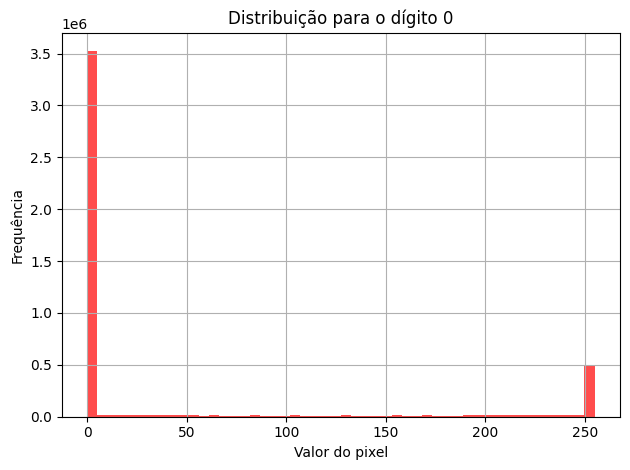

Quantidade total de pixels para o dígito 0 é de: 4641280.
Quantidade de pixels de valor 0 para o dígito 0 é de: 3505270.
O percentual de pixels 0 para o dígito 0 no histograma é de: 75.52%


In [ ]:
plot_pixel_distribution(0)

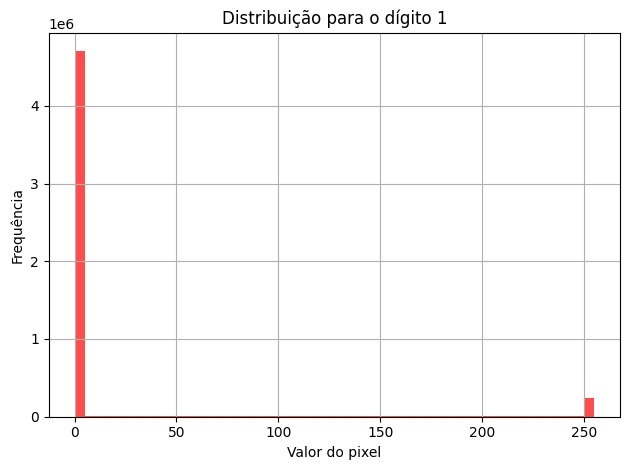

Quantidade total de pixels para o dígito 1 é de: 5272400.
Quantidade de pixels de valor 0 para o dígito 1 é de: 4694549.
O percentual de pixels 0 para o dígito 1 no histograma é de: 89.04%


In [ ]:
plot_pixel_distribution(1)

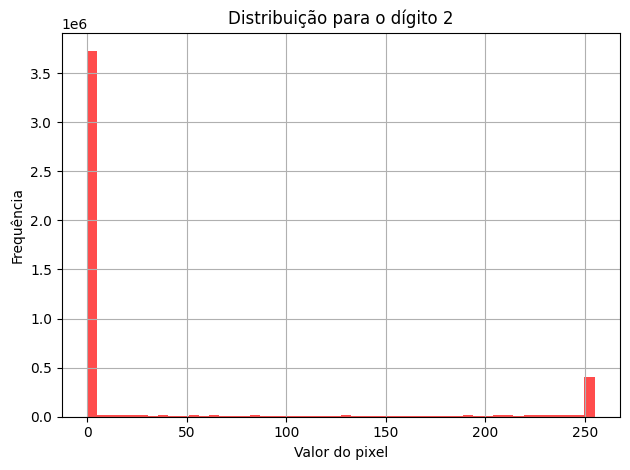

Quantidade total de pixels para o dígito 2 é de: 4722032.
Quantidade de pixels de valor 0 para o dígito 2 é de: 3705600.
O percentual de pixels 0 para o dígito 2 no histograma é de: 78.47%


In [ ]:
plot_pixel_distribution(2)

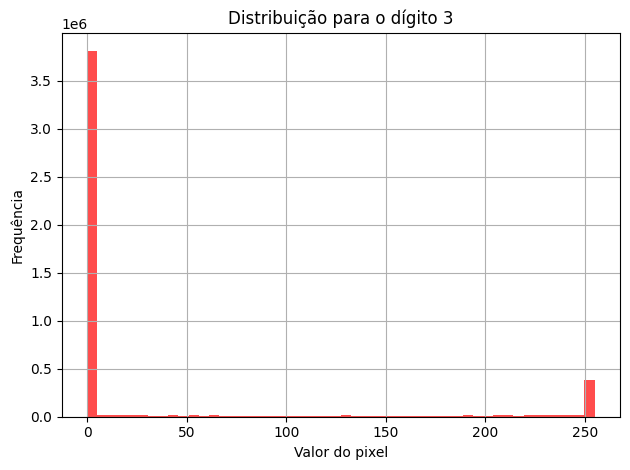

Quantidade total de pixels para o dígito 3 é de: 4787888.
Quantidade de pixels de valor 0 para o dígito 3 é de: 3788179.
O percentual de pixels 0 para o dígito 3 no histograma é de: 79.12%


In [ ]:
plot_pixel_distribution(3)

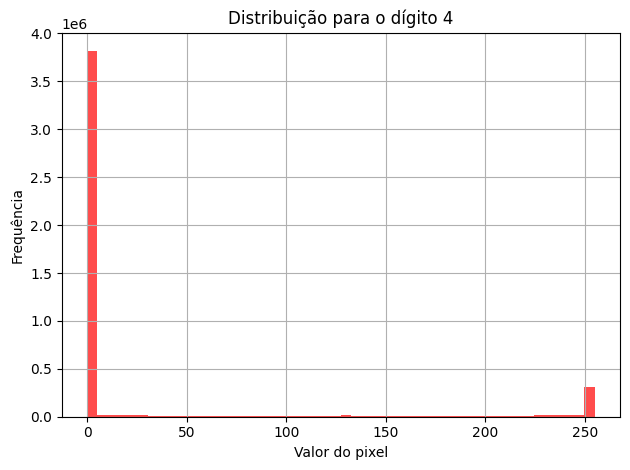

Quantidade total de pixels para o dígito 4 é de: 4639712.
Quantidade de pixels de valor 0 para o dígito 4 é de: 3799172.
O percentual de pixels 0 para o dígito 4 no histograma é de: 81.88%


In [ ]:
plot_pixel_distribution(4)

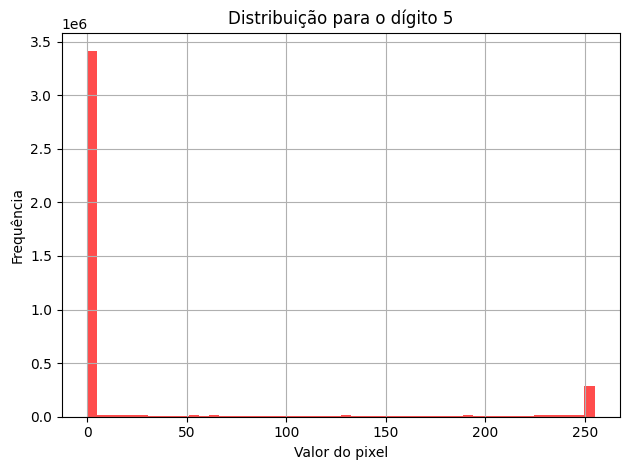

Quantidade total de pixels para o dígito 5 é de: 4214784.
Quantidade de pixels de valor 0 para o dígito 5 é de: 3394177.
O percentual de pixels 0 para o dígito 5 no histograma é de: 80.53%


In [ ]:
plot_pixel_distribution(5)

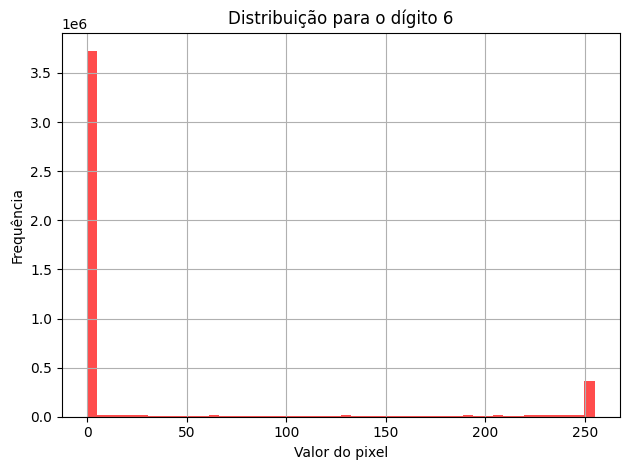

Quantidade total de pixels para o dígito 6 é de: 4637360.
Quantidade de pixels de valor 0 para o dígito 6 é de: 3703953.
O percentual de pixels 0 para o dígito 6 no histograma é de: 79.87%


In [ ]:
plot_pixel_distribution(6)

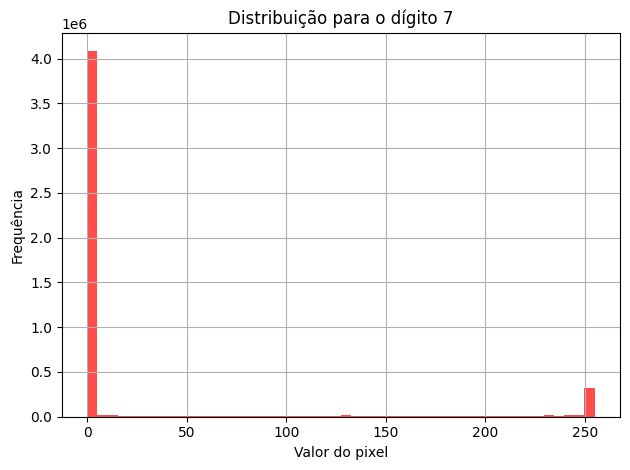

Quantidade total de pixels para o dígito 7 é de: 4890592.
Quantidade de pixels de valor 0 para o dígito 7 é de: 4070421.
O percentual de pixels 0 para o dígito 7 no histograma é de: 83.23%


In [ ]:
plot_pixel_distribution(7)

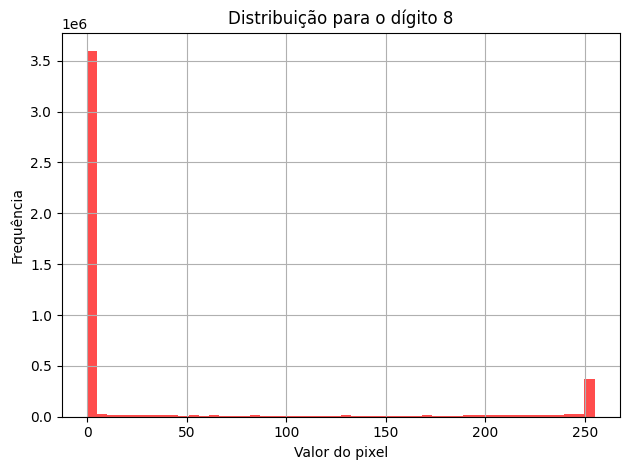

Quantidade total de pixels para o dígito 8 é de: 4591104.
Quantidade de pixels de valor 0 para o dígito 8 é de: 3573904.
O percentual de pixels 0 para o dígito 8 no histograma é de: 77.84%


In [ ]:
plot_pixel_distribution(8)

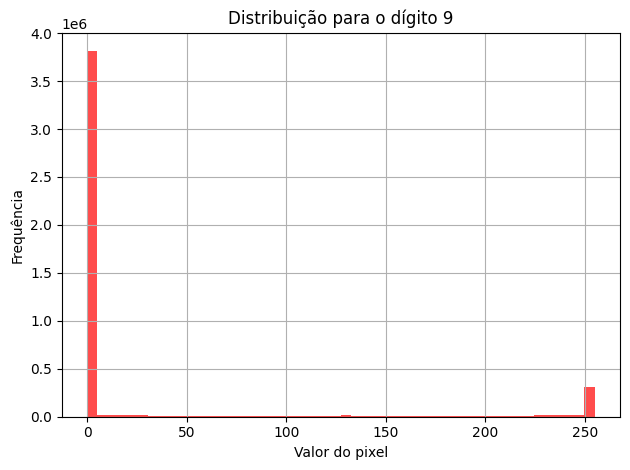

Quantidade total de pixels para o dígito 9 é de: 4642848.
Quantidade de pixels de valor 0 para o dígito 9 é de: 3794756.
O percentual de pixels 0 para o dígito 9 no histograma é de: 81.73%


In [ ]:
plot_pixel_distribution(9)

#### Conclusão:

Pelos histogramas, fica fácil de visualizar que a maioria esmagadora dos pixels das imagens de cada dígito possui valor 0 (preto). Em seguida, aparece, em segundo lugar, os valores de 255 (branco). Era o esperado, já que o fundo das imagens são pretas e os dígitos são representados em branco.

## 🤓 Item c)

##### Crie uma imagem para cada dígito (de 0 a 9) em que cada píxel dessa nova imagem representa a média do valor dos píxeis para aquela classe. Você consegue reconhecer os dígitos nas imagens criadas?

O loop abaixo cria imagens com a média de valor dos pixels para cada dígito (0-9).

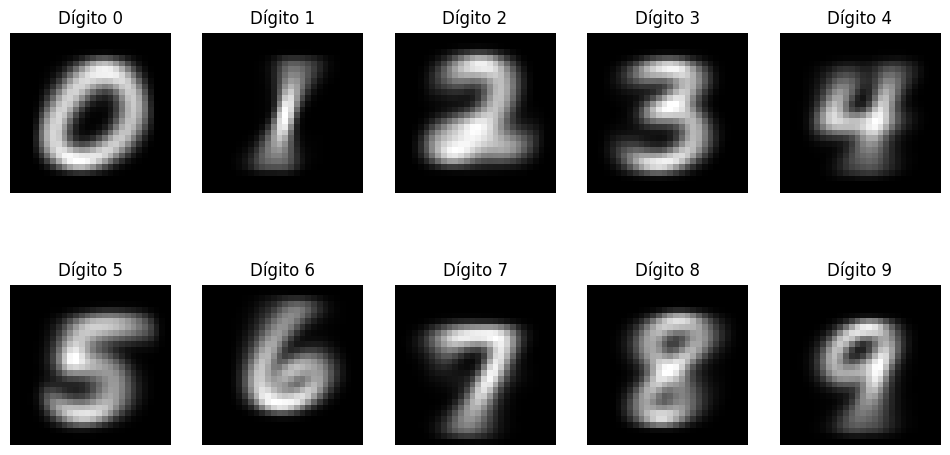

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(12, 6))  # grid de 2x5 para os subplots
axes = axes.flatten()

for digito in range(10):
    # Selecionar as imagens correspondentes ao dígito
    imgs_classe = X_tot[y_tot == digito]

    # Calcula a média de cada pixel
    imagem_media = np.mean(imgs_classe, axis=0)

    ax = axes[digito]
    ax.imshow(imagem_media, cmap='gray')
    ax.set_title(f'Dígito {digito}')
    ax.axis('off')


É possível reconhecer os números nas imagens criadas com os valores médios de pixels de cada dígito.

---

# 3️⃣ Tarefa 03: Treinamento e Teste de Modelos 🤖

## 📈 Item a)

Treine a ANN1 com 784 entradas, 8 neurônios na 1⁠ª camada oculta, 8 neurônios na 2⁠ª camada oculta e 10 saídas. Utilize 5 épocas para o treinamento. Use a biblioteca `scikit-learn`:

- Input Layer: 784 entradas (28x28);
- Hidden Layer 1: 8 neurônios;
- Hidden Layer 2: 8 neurônios;
- Output Layer: 10 saídas; (Classificador 0-9)
- Treine com 10 épocas.

Colocando input de 28x28 para 784.

In [ ]:
X_tot_784 = X_tot.reshape(X_tot.shape[0], -1)  # array (60000, 784)
X_tot_784.shape

(60000, 784)

In [ ]:
# Divide os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_tot_784, y_tot, test_size=0.2, random_state=42)

# Normaliza os dados (StandardScaler para normalização)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Cria e configurar o modelo MLP
mlp = MLPClassifier(hidden_layer_sizes=(8, 8),  # 2 camadas ocultas, cada uma com 8 neurônios
                    max_iter=10,               # Número de épocas (iterações)
                    solver='adam',             # Otimização
                    random_state=42,
                    verbose=True)              # Exibe o progresso do treinamento

In [ ]:
# Treina o modelo
mlp.fit(X_train, y_train)

Iteration 1, loss = 1.09173773
Iteration 2, loss = 0.49921453
Iteration 3, loss = 0.39920961
Iteration 4, loss = 0.35840851
Iteration 5, loss = 0.33319883
Iteration 6, loss = 0.31520505
Iteration 7, loss = 0.30137185
Iteration 8, loss = 0.29062572
Iteration 9, loss = 0.28227599
Iteration 10, loss = 0.27530949


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(8, 8), max_iter=10, random_state=42,
              verbose=True)

In [ ]:
# Avalia o modelo
y_pred = mlp.predict(X_test)
print("\nRelatório de classificação:\n")
print(classification_report(y_test, y_pred))


Relatório de classificação:

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1216
           1       0.95      0.94      0.95      1375
           2       0.89      0.91      0.90      1209
           3       0.90      0.85      0.87      1217
           4       0.89      0.93      0.91      1163
           5       0.85      0.88      0.86      1052
           6       0.95      0.94      0.94      1138
           7       0.93      0.92      0.92      1297
           8       0.89      0.89      0.89      1182
           9       0.90      0.86      0.88      1151

    accuracy                           0.91     12000
   macro avg       0.91      0.91      0.91     12000
weighted avg       0.91      0.91      0.91     12000



Com uma acurácia de 91%, o resultado apresentou-se satisfatório, com um tempo de processamento bem rápido.

## 📉 Item b)

Treine a ANN2 com 784 entradas, 256 neurônios na 1⁠ª camada oculta, 256 neurônios na 2⁠ª camada oculta, 256 neurônios na 3ª camada oculta, 256 neurônios na 4ª camada oculta e 10 saídas. Utilize 20 épocas dessa vez. Use a biblioteca `scikit-learn`.

- Input Layer: 784 entradas (28x28);
- Hidden Layer 1: 256 neurônios;
- Hidden Layer 2: 256 neurônios;
- Hidden Layer 3: 256 neurônios;
- Hidden Layer 4: 256 neurônios;
- Output Layer: 10 saídas; (Classificação 0-9)
- Treine com 20 épocas.

In [ ]:
# Cria e configurar o modelo MLP
mlp_b = MLPClassifier(hidden_layer_sizes=(256, 256, 256, 256),  # 4 camadas ocultas, cada uma com 256 neurônios
                    max_iter=20,               # Número de épocas (iterações)
                    random_state=42,
                    solver='adam',             # Otimização
                    verbose=True)              # Exibe o progresso do treinamento

In [ ]:
# Treina o modelo
mlp_b.fit(X_train, y_train)

Iteration 1, loss = 0.29305228
Iteration 2, loss = 0.10059861
Iteration 3, loss = 0.06335545
Iteration 4, loss = 0.04674871
Iteration 5, loss = 0.03880016
Iteration 6, loss = 0.02997939
Iteration 7, loss = 0.02633387
Iteration 8, loss = 0.02558609
Iteration 9, loss = 0.01583591
Iteration 10, loss = 0.02806609
Iteration 11, loss = 0.02274653
Iteration 12, loss = 0.02165268
Iteration 13, loss = 0.01455243
Iteration 14, loss = 0.01232412
Iteration 15, loss = 0.01201030
Iteration 16, loss = 0.01973590
Iteration 17, loss = 0.01324625
Iteration 18, loss = 0.00905079
Iteration 19, loss = 0.01005605
Iteration 20, loss = 0.01810003


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(256, 256, 256, 256), max_iter=20,
              random_state=42, verbose=True)

In [ ]:
# Avalia o modelo
y_pred_b = mlp_b.predict(X_test)
print("\nRelatório de classificação:\n")
print(classification_report(y_test, y_pred_b))


Relatório de classificação:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1216
           1       0.99      0.99      0.99      1375
           2       0.96      0.97      0.97      1209
           3       0.98      0.94      0.96      1217
           4       0.97      0.98      0.98      1163
           5       0.97      0.96      0.96      1052
           6       0.98      0.98      0.98      1138
           7       0.96      0.98      0.97      1297
           8       0.96      0.97      0.96      1182
           9       0.96      0.98      0.97      1151

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000



Houve um aumento significativo na acurácia para 97%, resultado do acréscimo de mais camadas e neurônios na rede neural. O trade-off é o aumento do tempo de processamento.

## ⚙️ Item c)

##### Agora você treinará um novo modelo, mais adequado. Para isso, gere ao menos 5 configurações de redes neurais, variando o número de camadas ocultas, o número de neurônios e o número de épocas. As configurações devem estar intermediárias entre `[8, 8]` e `[256, 256, 256, 256]`.

##### Utilize a função `GridSearchCV` para realizar uma busca exaustiva pelos hiperparâmetros e encontre a configuração que oferece o melhor classificador, justificando sua escolha com base nas métricas de validação.

As configurações escolhidas foram: (16, 16), (32, 32, 32), (64, 64, 64), (128, 64, 128) e (32, 64, 128, 128). O número de épocas foi variado em 10 e 20.

In [ ]:
# Definição dos hiperparâmetros para a GridSearchCV
param_grid = {
    'hidden_layer_sizes': [
        (16, 16),                  # Configuração pequena
        (32, 32, 32),                  # Configuração intermediária 1
        (64, 64, 64),              # Configuração intermediária 2
        (128, 256, 128),           # Configuração intermediária 3
        (32, 64, 128, 128)       # Configuração maior
    ],
    'max_iter': [10, 20],    # Varia o número de épocas
    'solver': ['adam'],           # Otimizador
    'random_state': [42]          # Para reprodutibilidade
}

# Configuração do classificador e da busca em grade
mlp_c = MLPClassifier()
grid_search = GridSearchCV(
    estimator=mlp_c,
    param_grid=param_grid,
    scoring='accuracy',    # Métrica de validação
    cv=3,                  # Validação cruzada
    verbose=2,             # Mostra o progresso
    n_jobs=-1              # Usa todos os núcleos disponíveis
)


In [ ]:
# Treinamento da GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reac

GridSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(16, 16), (32, 32, 32),
                                                (64, 64, 64), (128, 256, 128),
                                                (32, 64, 128, 128)],
                         'max_iter': [10, 20], 'random_state': [42],
                         'solver': ['adam']},
             scoring='accuracy', verbose=2)

In [ ]:
# Melhor modelo e avaliação
best_model = grid_search.best_estimator_
print("Melhores hiperparâmetros:", grid_search.best_params_)

Melhores hiperparâmetros: {'hidden_layer_sizes': (128, 256, 128), 'max_iter': 20, 'random_state': 42, 'solver': 'adam'}


In [ ]:
# Avaliação no conjunto de teste
y_pred = best_model.predict(X_test)
print("Acurácia no teste: {:.3f}".format(accuracy_score(y_test, y_pred)))
print("\nRelatório de classificação:\n", classification_report(y_test, y_pred))

Acurácia no teste: 0.975

Relatório de classificação:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1216
           1       0.99      0.98      0.99      1375
           2       0.96      0.98      0.97      1209
           3       0.99      0.95      0.97      1217
           4       0.97      0.97      0.97      1163
           5       0.97      0.97      0.97      1052
           6       0.98      0.98      0.98      1138
           7       0.97      0.98      0.98      1297
           8       0.97      0.97      0.97      1182
           9       0.97      0.97      0.97      1151

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.98      0.97      0.97     12000



O melhor hiperparâmetro foi determinado em 3 camadas com 128 neurônios cada (128, 256, 128), com uso de 20 épocas. Mesmo possuindo menos camadas que a configuração (32, 64, 128, 128) o desempenho foi superior. Pode-se inferir que um modelo mais complexo tem uma maior capacidade de aprendizado, mas isso pode levar a overfitting. Além disso, a complexidade adicional não necessariamente contribui para melhor desempenho.

## 🔧 Item d)

##### Para os modelos treinados nas questões a) e b), além do classificador encontrado na questão c), compare o desempenho dos modelos, analisando se apresentam *underfitting* ou *overfitting*. Justifique com gráficos e análises.


Segue uma função para treinar o modelo e registrar a acurácia e o loss ao longo das épocas.

In [ ]:
def train_model(layers, max_iter, model):
    print(f"\n{model}:")
    modelo = MLPClassifier(
        hidden_layer_sizes=layers,
        max_iter=1,       # Treino de uma época por vez
        warm_start=True,  # Continua o treinamento de onde parou
        solver='adam',
        random_state=42
    )

    # Listas para salvar acurácias em treino e teste
    train_accuracy_list = []
    test_accuracy_list = []
    # Lista para salvar histórico de perda
    loss_list = []

    for epoca in range(max_iter):
        modelo.fit(X_train, y_train)
        # Faz a avaliação do conjunto de treinamento
        y_train_pred = modelo.predict(X_train)
        train_accuracy_list.append(accuracy_score(y_train, y_train_pred))
        # Faz a avaliação conjunto de teste
        y_test_pred = modelo.predict(X_test)
        test_accuracy_list.append(accuracy_score(y_test, y_test_pred))
        # Loss do treinamento atual
        loss_list.append(modelo.loss_)

    return train_accuracy_list, test_accuracy_list, loss_list

In [ ]:
# Configurações dos modelos
models_selected = [
    {"name": "ANN1 [8, 8]", "layers": (8, 8), "max_iter": 10},
    {"name": "ANN2 [256, 256, 256, 256]", "layers": (256, 256, 256, 256), "max_iter": 20},
    {"name": "ANN3 [128, 256, 128]", "layers": (128, 256, 128), "max_iter": 20},
]

In [ ]:
# Treina os modelos e armazena resultados
results = {}
for config in models_selected:
    train_accuracy_list, test_accuracy_list, loss_list = train_model(config["layers"], config["max_iter"], config["name"])
    results[config["name"]] = {"train_accuracy_list": train_accuracy_list, "test_accuracy_list": test_accuracy_list,  "loss_list": loss_list,}


ANN1 [8, 8]:


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached 


ANN2 [256, 256, 256, 256]:


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached 


ANN3 [128, 256, 128]:


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached 

[CV] END hidden_layer_sizes=(16, 16), max_iter=10, random_state=42, solver=adam; total time=   9.9s
[CV] END hidden_layer_sizes=(32, 32, 32), max_iter=20, random_state=42, solver=adam; total time=  17.4s
[CV] END hidden_layer_sizes=(64, 64, 64), max_iter=20, random_state=42, solver=adam; total time=  36.2s
[CV] END hidden_layer_sizes=(32, 64, 128, 128), max_iter=10, random_state=42, solver=adam; total time=  25.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=(32, 32, 32), max_iter=10, random_state=42, solver=adam; total time=  13.0s
[CV] END hidden_layer_sizes=(64, 64, 64), max_iter=10, random_state=42, solver=adam; total time=  15.1s
[CV] END hidden_layer_sizes=(128, 256, 128), max_iter=10, random_state=42, solver=adam; total time=  42.3s
[CV] END hidden_layer_sizes=(32, 64, 128, 128), max_iter=10, random_state=42, solver=adam; total time=  23.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached 

[CV] END hidden_layer_sizes=(16, 16), max_iter=20, random_state=42, solver=adam; total time=  15.3s
[CV] END hidden_layer_sizes=(64, 64, 64), max_iter=10, random_state=42, solver=adam; total time=  15.4s
[CV] END hidden_layer_sizes=(128, 256, 128), max_iter=20, random_state=42, solver=adam; total time= 1.4min
[CV] END hidden_layer_sizes=(16, 16), max_iter=10, random_state=42, solver=adam; total time=  10.0s
[CV] END hidden_layer_sizes=(32, 32, 32), max_iter=20, random_state=42, solver=adam; total time=  17.8s
[CV] END hidden_layer_sizes=(128, 256, 128), max_iter=10, random_state=42, solver=adam; total time=  45.9s
[CV] END hidden_layer_sizes=(32, 64, 128, 128), max_iter=20, random_state=42, solver=adam; total time=  38.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Em seguida, realiza-se o plot para visualização gráfica dos resultados de acurácia.

[CV] END hidden_layer_sizes=(16, 16), max_iter=20, random_state=42, solver=adam; total time=  15.2s
[CV] END hidden_layer_sizes=(64, 64, 64), max_iter=10, random_state=42, solver=adam; total time=  15.3s
[CV] END hidden_layer_sizes=(128, 256, 128), max_iter=10, random_state=42, solver=adam; total time=  45.9s
[CV] END hidden_layer_sizes=(32, 64, 128, 128), max_iter=20, random_state=42, solver=adam; total time=  37.1s
[CV] END hidden_layer_sizes=(32, 32, 32), max_iter=10, random_state=42, solver=adam; total time=  12.8s
[CV] END hidden_layer_sizes=(32, 32, 32), max_iter=20, random_state=42, solver=adam; total time=  18.8s
[CV] END hidden_layer_sizes=(128, 256, 128), max_iter=20, random_state=42, solver=adam; total time= 1.4min
[CV] END hidden_layer_sizes=(16, 16), max_iter=10, random_state=42, solver=adam; total time=   9.7s
[CV] END hidden_layer_sizes=(32, 32, 32), max_iter=10, random_state=42, solver=adam; total time=   9.4s
[CV] END hidden_layer_sizes=(64, 64, 64), max_iter=20, rando

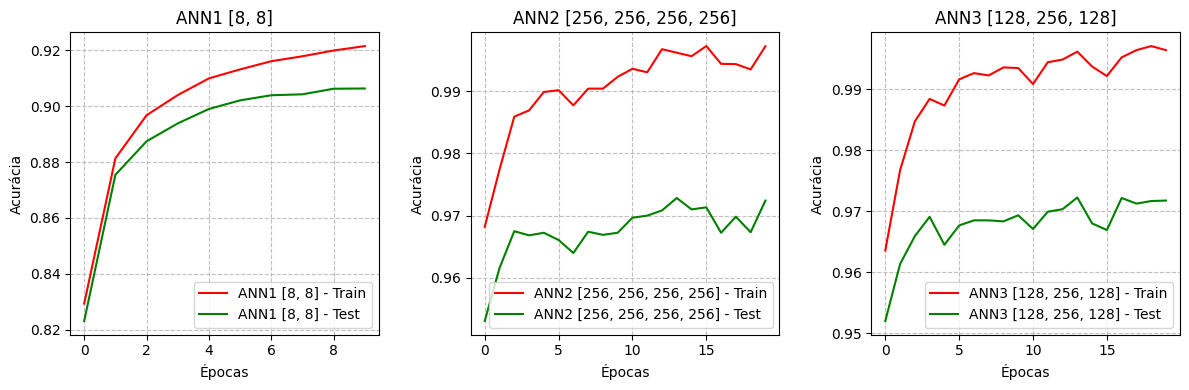

In [ ]:
plt.figure(figsize=(12, 4))

for i, (model, list) in enumerate(results.items(), start=1):
    plt.subplot(1, 3, i)
    plt.plot(list["train_accuracy_list"], label=f"{model} - Train", color='red')
    plt.plot(list["test_accuracy_list"], label=f"{model} - Test", color='green')
    plt.title(model)
    plt.xlabel("Épocas")
    plt.ylabel("Acurácia")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.8)

plt.tight_layout()
plt.show()

Apresentação gráfica do loss:

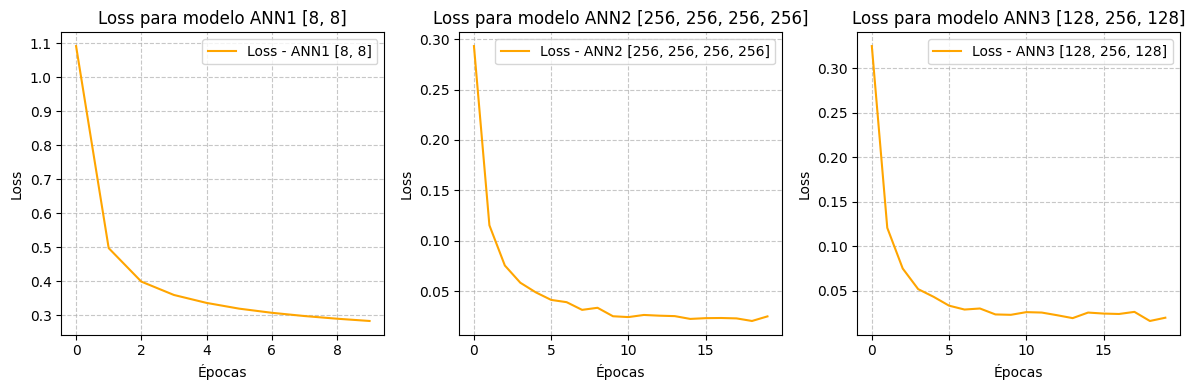

In [ ]:
plt.figure(figsize=(12, 4))

for i, (model, list) in enumerate(results.items(), start=1):
    plt.subplot(1, 3, i)
    plt.plot(list["loss_list"], label=f"Loss - {model}", color="orange")
    plt.title(f"Loss para modelo {model}")
    plt.xlabel("Épocas")
    plt.ylabel("Loss")
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.legend()
plt.tight_layout()
plt.show()

Pelos gráficos obtidos, é possível tirar algumas conclusões:

#### ANN1 [8, 8]:

- Observações:

A diferença entre as curvas (treinamento e teste) é pequena. O modelo alcança uma acurácia máxima de cerca de 92% no treinamento e um pouco acima de 90% no teste.

- Conclusão:

Este comportamento é típico de underfitting. O modelo é muito simples (apenas duas camadas com 8 neurônios cada) e não tem capacidade suficiente para capturar os padrões complexos dos dados. Ele não generaliza bem e apresenta limitações tanto no treinamento quanto no teste.

#### ANN2 [256, 256, 256, 256] e ANN3 [128, 256, 128]:

- Observações:

Ambos os modelos apresentam resultados semelhantes. A acurácia no treinamento atinge valores próximos de 99% rapidamente e a acurácia no teste chega a 97%. Existe uma diferença de aproximadamente 2% entre as curvas de treinamento e teste.

- Conclusão:

O modelo ANN2 [256, 256, 256, 256] é bem mais complexo (quatro camadas com 256 neurônios cada) que ANN3 [128, 256, 128] e apresenta desempenho semelhante. Como ANN3 é mais simples, necessitando de menos custo computacional, a escolha do melhor modelo seria realmente a ANN3.

---

# 4️⃣ Tarefa 04: Resultados e Visualizações 🤞🏻

## 🐳 Item a)

##### Gere e apresente uma matriz de confusão que mostre a distribuição das previsões do melhor modelo. Quais as métricas de Acurácia, Precisão, Recall e F1-Score para esse modelo?

In [ ]:
# Uso do melhor modelo, definido na questão anterior
mlp_best_model = MLPClassifier(
    hidden_layer_sizes=(128, 256, 128),
    max_iter=1,       # Uma época por vez
    warm_start=True,  # Permite continuar o treinamento
    solver='adam',
    random_state=42
)

In [ ]:
# Listas para registro de loss e acurácias
loss_ = []
train_accuracy = []
test_accuracy = []

for epoca in range(20):
    mlp_best_model.fit(X_train, y_train)
    # Registra a perda da época
    loss_.append(mlp_best_model.loss_)

    # Avaliação das acurácias de treinamento e de teste
    y_train_pred = mlp_best_model.predict(X_train)
    y_test_pred = mlp_best_model.predict(X_test)
    # Registra acurácias
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=(16, 16), max_iter=20, random_state=42, solver=adam; total time=  15.4s
[CV] END hidden_layer_sizes=(64, 64, 64), max_iter=20, random_state=42, solver=adam; total time=  33.5s
[CV] END hidden_layer_sizes=(128, 256, 128), max_iter=20, random_state=42, solver=adam; total time= 1.2min


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached 

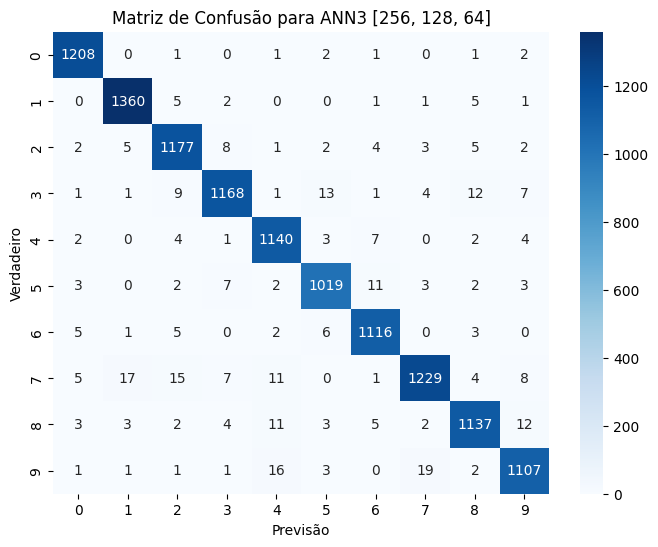

In [ ]:
# Previsões no conjunto de teste para melhor modelo
y_pred = mlp_best_model.predict(X_test)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Matriz de Confusão para ANN3 [256, 128, 64]')
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.show()

Pela visualização da matriz de confusão, é possível notar que o modelo confundiu bastante o 4 (verdadeiro) com o 9 (previsão) com 28 classificações erradas, o contrário não ocorreu, sendo 6 classificações do 9 (verdadeiro) com o 4 (previsão). Outros erros relevantes foram: 0(Verdadeiro)/5(Previsão), 0(V)/5(P), 3(V)/2(P), 5(V)/3(P), 9(V)/7(P).

In [ ]:
# Cálculo das métricas acurácia, precisão, recall e f1-score
accuracy_4a = accuracy_score(y_test, y_pred)
precision_4a = precision_score(y_test, y_pred, average='weighted')
recall_4a = recall_score(y_test, y_pred, average='weighted')
f1_4a = f1_score(y_test, y_pred, average='weighted')

print(f"A acurácia é de: {accuracy_4a:.3f}")
print(f"A precisão é de: {precision_4a:.3f}")
print(f"O Recall é de: {recall_4a:.3f}")
print(f"O F1-Score é de: {f1_4a:.3f}")

# Relatório detalhado por classe
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

A acurácia é de: 0.972
A precisão é de: 0.972
O Recall é de: 0.972
O F1-Score é de: 0.972

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1216
           1       0.98      0.99      0.98      1375
           2       0.96      0.97      0.97      1209
           3       0.97      0.96      0.97      1217
           4       0.96      0.98      0.97      1163
           5       0.97      0.97      0.97      1052
           6       0.97      0.98      0.98      1138
           7       0.97      0.95      0.96      1297
           8       0.97      0.96      0.97      1182
           9       0.97      0.96      0.96      1151

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000



## 🐸 Item b)

##### Exiba gráficos que mostram a evolução da acurácia e da perda (`Loss`) durante o treinamento do melhor modelo encontrado no item 3c).

In [ ]:
# Resultados do melhor modelo
results_4a = {"loss_": loss_, "train_accuracy": train_accuracy, "test_accuracy": test_accuracy,}

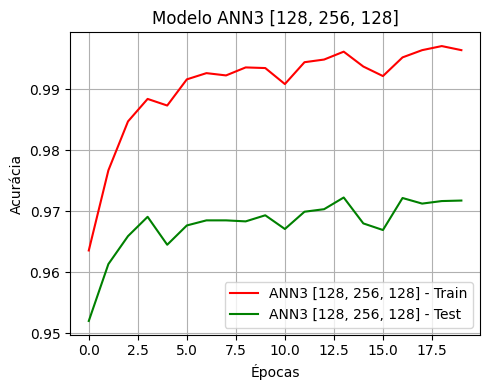

In [ ]:
model = "ANN3 [128, 256, 128]"

plt.figure(figsize=(5, 4))

plt.plot(results_4a["train_accuracy"], label=f"{model} - Train", color='red')
plt.plot(results_4a["test_accuracy"], label=f"{model} - Test", color='green')
plt.title(f"Modelo {model}")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

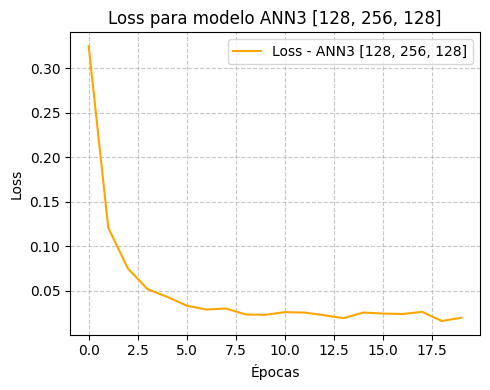

In [ ]:
plt.figure(figsize=(5, 4))

plt.plot(list["loss_list"], label=f"Loss - {model}", color="orange")
plt.title(f"Loss para modelo {model}")
plt.xlabel("Épocas")
plt.ylabel("Loss")
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

No gráfico de evolução da acurácia, percebe-se que as acurácias tanto de teste quanto de treinamento tiveram crescimento rápido no início e depois mantiveram certa estabilidade . A diferença de valores ficou relativamente próxima, em torno de 2.5%, o que sugere que não houve overfitting.

Pelo gráfico de Loss, é possível observar que a curva decresce rapidamente, estabilizando em valores próximos a 0. Isso indica que o modelo está aprendendo e ajustando seus parâmetros para reduzir os erros na previsão.

## 🦖 Item c)

##### Escolha algumas imagens do conjunto de teste e mostre previsões do seu modelo, com acertos e erros. Discuta quais fatores podem ter contribuído para essas previsões corretas e incorretas.

In [ ]:
def imagem_digito(imagem, titulo, ax):
    ax.imshow(imagem.reshape(28, 28), cmap='gray')
    ax.set_title(titulo)
    ax.axis('off')

mlp_best_model = MLPClassifier(
    hidden_layer_sizes=(128, 256, 128),
    max_iter=20,
    solver='adam',
    random_state=42
)

mlp_best_model.fit(X_train, y_train)

# Predições
y_pred = mlp_best_model.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


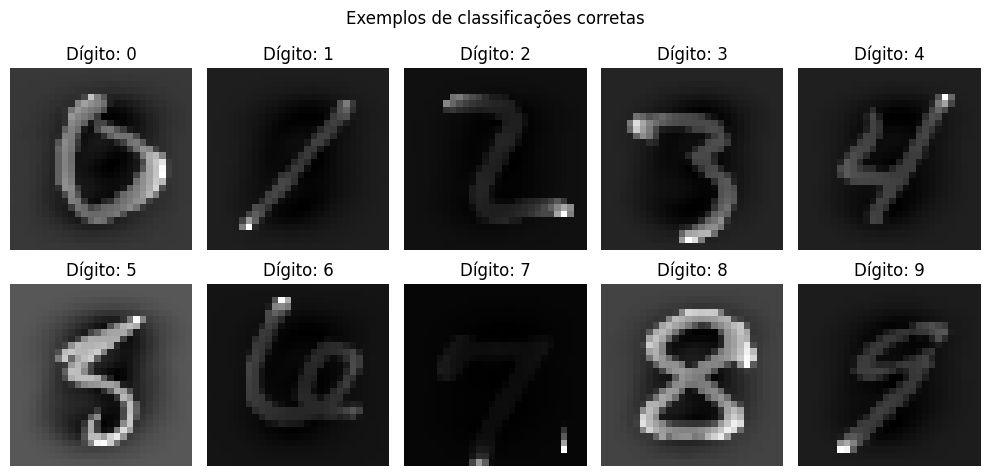

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
fig.suptitle("Exemplos de classificações corretas", fontsize=12)
axes = axes.ravel()

# Para cada dígito (0 a 9)
for digito in range(10):
    indices_corretos = np.where((y_pred == y_test) & (y_test == digito))[0]
    if len(indices_corretos) > 0:
        mostrar_imagem(X_test[indices_corretos[0]], f"Dígito: {digito}", axes[digito])

plt.tight_layout()
plt.show()

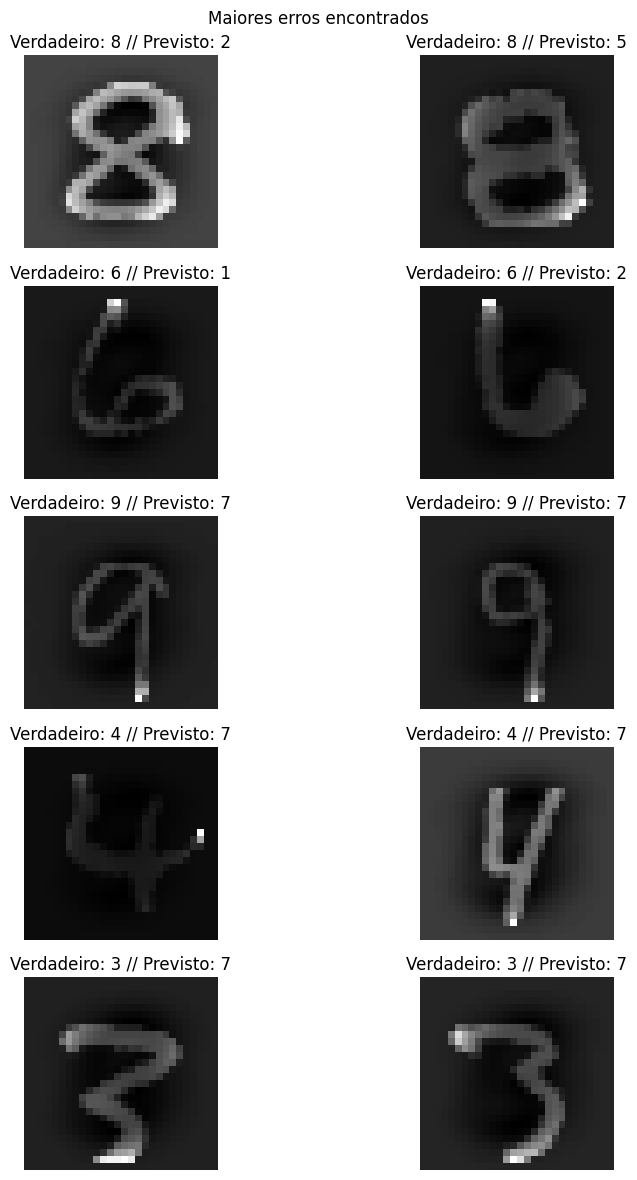

In [ ]:
# Dígitos com mais erros
erros = y_test[y_test != y_pred]
# Conta os erros por classe
contagem_erros = Counter(erros)

# Encontra os 5 dígitos com mais erros
digitos_err = [digito for digito, _ in contagem_erros.most_common(5)]

fig, axes = plt.subplots(5, 2, figsize=(10, 12))
fig.suptitle("Maiores erros encontrados", fontsize=12)
axes = axes.ravel()

# Duas imagens classificadas incorretamente para cada dígito com mais erros
for i, digito in enumerate(digitos_err):
    index_err = np.where((y_test == digito) & (y_pred != digito))[0]
    for j in range(2):
        if j < len(index_err):
            mostrar_imagem(X_test[index_err[j]], f"Verdadeiro: {digito} // Previsto: {y_pred[index_err[j]]}", axes[i * 2 + j])

plt.tight_layout()
plt.show()

---

# 5️⃣ Tarefa 05: Lembrete *Kaggle* e Documentação 🗃️

## 😮‍💨 Item a)

# Lembre-se de publicar no *Kaggle* com o título correto e padronizado!

## 🙏🏻 Item b)

# Lembre-se de documentar adequadamente seu código e conclusões!

In [ ]:
X_train = X_tot.reshape(-1, 28 * 28) / 255
X_val = X_val.reshape(-1, 28 * 28) / 255
y_train = y_tot

ANNsub = MLPClassifier(
    hidden_layer_sizes=(256, 128, 64),
    max_iter=20,
    solver='adam',
    random_state=42
    )

ANNsub.fit(X_train, y_train)

y_pred = ANNsub.predict(X_val)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
df = pd.DataFrame({'ID': np.arange(1,len(y_pred) + 1), 'Answer':y_pred})
df.set_index("ID", inplace = True)
df.to_csv('submission.csv')
df.head()

,Answer
ID,
1,8
2,4
3,8
4,7
5,7
